## CONTENT LIST
1. Import Data and Libraries
2. Data Wrangling
3. Data Merging
4. Data Cleaning 
5. Splitting DF to run Choropleth
6. Plotting a Choropleth

# 1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot

In [2]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [3]:
path = r'C:\Users\chery\Desktop\CareerFoundry\Immersion Data Analytics\Achievement 6'

In [4]:
# Import ".shp" file for the U.S. shape outline using the Geopandas `read_csv` command.

usa = gpd.read_file(os.path.join(path, 'WinRAR for Task 6.3','USA_States.shp'))

In [5]:
# View the head of the new Geodataframe

usa.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [5]:
# Import PPP data

df = pd.read_pickle(os.path.join(path, '04-2021 PPP Loan Analysis','02 Data', 'Prepared Data','ppp_cleaned.pkl'))

In [8]:
df.head()

,loan_amount,city,state,zip,industry_code,business_type,business_owner_race,business_owner_gender,business_owner_vet_status,jobs_reported,date_loan_approved,lender,congressional_district
0,149978.0,Pelham,AL,35124.0,561311.0,Limited Liability Company(LLC),NaN,NaN,NaN,17.0,05/07/2020,Truist Bank d/b/a Branch Banking & Trust Co,AL-06
1,149900.0,Birmingham,AL,35242.0,561311.0,Corporation,NaN,Female Owned,NaN,39.0,04/13/2020,Peoples Bank of Alabama,AL-06
2,149887.0,Trussville,AL,35173.0,238910.0,Limited Liability Company(LLC),NaN,NaN,NaN,14.0,04/15/2020,Bryant Bank,AL-06
3,149865.0,Trussville,AL,35173.0,621340.0,Self-Employed Individuals,NaN,NaN,NaN,0.0,04/30/2020,Regions Bank,AL-06
4,149862.0,Springville,AL,35146.0,624221.0,Non-Profit Organization,NaN,NaN,NaN,19.0,04/12/2020,"South State Bank, National Association",AL-06


In [9]:
df.shape

(4241736, 13)

# 2. Data Wrangling

In [10]:
#Rename PPP data 'state' column to 'STATE_ABBR' to match shapefile's column

df.rename(columns = {'state':'STATE_ABBR'}, inplace=True)

In [11]:
#Check column renamed

df.head()

,loan_amount,city,STATE_ABBR,zip,industry_code,business_type,business_owner_race,business_owner_gender,business_owner_vet_status,jobs_reported,date_loan_approved,lender,congressional_district
0,149978.0,Pelham,AL,35124.0,561311.0,Limited Liability Company(LLC),NaN,NaN,NaN,17.0,05/07/2020,Truist Bank d/b/a Branch Banking & Trust Co,AL-06
1,149900.0,Birmingham,AL,35242.0,561311.0,Corporation,NaN,Female Owned,NaN,39.0,04/13/2020,Peoples Bank of Alabama,AL-06
2,149887.0,Trussville,AL,35173.0,238910.0,Limited Liability Company(LLC),NaN,NaN,NaN,14.0,04/15/2020,Bryant Bank,AL-06
3,149865.0,Trussville,AL,35173.0,621340.0,Self-Employed Individuals,NaN,NaN,NaN,0.0,04/30/2020,Regions Bank,AL-06
4,149862.0,Springville,AL,35146.0,624221.0,Non-Profit Organization,NaN,NaN,NaN,19.0,04/12/2020,"South State Bank, National Association",AL-06


# 3. Data Merging

In [12]:
# Merge both dataframes on the "STATE_ABBR" column.

# NB: You need to merge the PPP dataframe INTO the GeoDataFrame; otherwise, the output will be a pandas dataframe rather 
# than a Geopandas dataframe.

df_merged = usa.merge(df, on = 'STATE_ABBR', how = 'outer', indicator = True)

In [13]:
#Checking data type

type(df_merged)

geopandas.geodataframe.GeoDataFrame

In [14]:
#Checking df shape

df_merged.shape

(4241736, 17)

In [15]:
df_merged.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,loan_amount,city,zip,industry_code,business_type,business_owner_race,business_owner_gender,business_owner_vet_status,jobs_reported,date_loan_approved,lender,congressional_district,_merge
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149992.0,Bellingham,98225.0,nan,Subchapter S Corporation,NaN,NaN,NaN,11.0,05/01/2020,"JPMorgan Chase Bank, National Association",WA-02,both
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149980.0,Spokane Valley,99216.0,621210.0,Limited Liability Company(LLC),NaN,NaN,NaN,12.0,04/29/2020,Banner Bank,WA-05,both
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149975.0,Kirkland,98033.0,339999.0,Subchapter S Corporation,NaN,NaN,NaN,6.0,04/16/2020,Seattle Bank,WA-01,both
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149950.0,Port Orchard,98367.0,238210.0,Limited Liability Company(LLC),NaN,NaN,NaN,10.0,06/13/2020,"Kabbage, Inc.",WA-06,both
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149922.0,Burlington,98233.0,999990.0,Subchapter S Corporation,NaN,NaN,NaN,12.0,05/03/2020,Cross River Bank,WA-02,both


In [16]:
df_merged['_merge'].value_counts()

both          4200172
right_only      41564
left_only           0
Name: _merge, dtype: int64

# 4. Data Cleaning

## Missing Values Check

In [17]:
# Check for missing values.

df_merged.isnull().sum()

STATE_NAME                     41564
STATE_FIPS                     41564
STATE_ABBR                         0
geometry                       41564
loan_amount                        0
city                               0
zip                                0
industry_code                      0
business_type                      0
business_owner_race          3810892
business_owner_gender        3353399
business_owner_vet_status    3646406
jobs_reported                      0
date_loan_approved                 0
lender                             0
congressional_district             0
_merge                             0
dtype: int64

In [18]:
# Remove the 41,564 rows from Geodataframe that are blank

df_merged_clean = df_merged[df_merged['STATE_NAME'].isnull() == False]

In [19]:
# Check for missing values.

df_merged_clean.isnull().sum()

STATE_NAME                         0
STATE_FIPS                         0
STATE_ABBR                         0
geometry                           0
loan_amount                        0
city                               0
zip                                0
industry_code                      0
business_type                      0
business_owner_race          3773255
business_owner_gender        3322909
business_owner_vet_status    3612897
jobs_reported                      0
date_loan_approved                 0
lender                             0
congressional_district             0
_merge                             0
dtype: int64

In [20]:
# By removing the observations above, you also solved the problem of not having a full match after the merge.

df_merged_clean['_merge'].value_counts(dropna = False)

both          4200172
left_only           0
right_only          0
Name: _merge, dtype: int64

## Importing DF Where Cleaning Left Off

In [6]:
# Import Merged Clean DF

df_final = pd.read_pickle(os.path.join(path, '04-2021 PPP Loan Analysis','02 Data', 'Prepared Data','Task 6.3 Merged.pkl'))

## Duplicates Check

In [7]:
df_final.isnull()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,loan_amount,city,zip,industry_code,business_type,business_owner_race,business_owner_gender,business_owner_vet_status,jobs_reported,date_loan_approved,lender,congressional_district,_merge
0,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200167,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4200168,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
4200169,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
4200170,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False


## Extreme Values Check

<AxesSubplot:xlabel='loan_amount', ylabel='Count'>

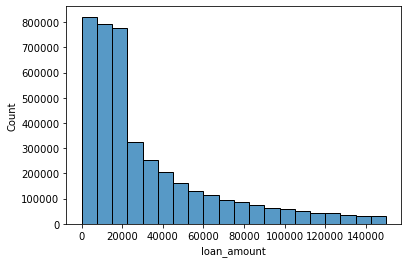

In [7]:
 # Shows extreme values for "loan_amount"
    
sns.histplot(df_final['loan_amount'], bins=20)

#### No extreme 'loan amount' values per above histogram

<AxesSubplot:xlabel='jobs_reported', ylabel='Count'>

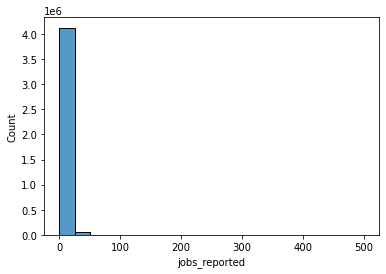

In [8]:
 # Shows extreme values for "jobs_reported"
    
sns.histplot(df_final['jobs_reported'], bins=20)

#### No extreme 'job reported' values per above histogram

# 5. Splitting DF to run Choropleth

In [7]:
#Create List holding True/False values to test np.random.rand() <=0.7

np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7

In [8]:
#Results of New List
dev

array([False,  True, False, ...,  True, False,  True])

In [9]:
#Store 70% of sample in df big, Store 30% of sample in df small

big = df_final[dev]
small = df_final[~dev]

In [10]:
#Checking Size of Original df
len(df)

4241736

In [11]:
#Checking Size of Big & Small df combined
len(big)+len(small)

4200172

In [14]:
#Reduce samples to only columns necessary for the chart

df_small_1 = small[['loan_amount','geometry']]

In [15]:
#Reduce samples to only columns necessary for the chart

df_small_2 = small[['jobs_reported', 'geometry']]

# 6. Plotting a choropleth

#### A. Using Geoplot - Loan Amount

In [16]:
df_small_1.head()

,loan_amount,geometry
0,149992.0,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,149975.0,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
3,149950.0,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
6,149917.0,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
10,149900.0,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."


In [7]:
df_loan_amount = df_final.loc[0:4200172,['loan_amount','geometry']]

In [8]:
df_loan_amount.shape

(4200172, 2)

In [ ]:
gp = geoplot.choropleth(
    df_small_1, hue = 'loan_amount', scheme = None,
    cmap='Reds', figsize=(15, 15)
)

#### B. Using Geoplot - Jobs Reported

In [ ]:
gp_jobsreported = geoplot.choropleth(
    df_final, hue = df_final['jobs_reported'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

#### C. Using Matplotlib - Loan Amount

In [ ]:
# Create a subplot with `fig` and `ax`

fig, ax = plt.subplots(1, figsize=(15, 15))

In [ ]:
plt.title('Highest Loan Amounts in the US', size=30)
loan_amount = df_final.plot(column='loan_amount',
cmap='Pinks',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [ ]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Pinks', norm=plt.Normalize(vmin = df_final['loan_amount'].min(), vmax = df_final['loan_amount'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

In [ ]:
loan_amount.figure

#### D. Using Matplotlib - Jobs Reported

In [ ]:
plt.title('Largest Number of Jobs Reported in the US', size=30)
jobs_reported = df_final.plot(column='jobs_reported',
cmap='Pinks',      # Color map for the states                     
             linewidth=0.6,      # Line width for state borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [ ]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Pinks', norm=plt.Normalize(vmin=df_final['jobs_reported'].min(), vmax=df_final['jobs_reported'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

In [ ]:
jobs_reported.figure